In [1]:
from pyluos import Robot
from spherical_joint import Actuator
import time
import math
import numpy as np
import threading

In [2]:
r = Robot('/dev/cu.usbserial-DN05NM15')
print(r.modules)

Connected to "/dev/cu.usbserial-DN05NM15".
Sending detection signal.
Waiting for route table...
Robot setup.
-------------------------------------------------
Type                Alias               ID   
-------------------------------------------------
Gate                gate                1    
ControlledMotor     disk_bottom         2    
ControlledMotor     disk_top            3    
ControlledMotor     disk_middle         4    



### Parameters of the actuator

In [3]:
R0 = [[math.cos(30*math.pi/180),-math.sin(30*math.pi/180),0],[math.sin(30*math.pi/180),math.cos(30*math.pi/180),0],[0,0,1]]
a = Actuator([0,0,93],[0,0,73],33.5,R0)

#r.gate.delay=10
r.disk_bottom.rot_position=False
r.disk_middle.rot_position=False
r.disk_top.rot_position=False

r.disk_bottom.limit_current = 0.8
r.disk_middle.limit_current = 0.8
r.disk_top.limit_current = 0.8


###########Setup############

r.disk_bottom.encoder_res = 5
r.disk_middle.encoder_res = 5
r.disk_top.encoder_res = 5


r.disk_bottom.setToZero()
r.disk_middle.setToZero()
r.disk_top.setToZero()


r.disk_bottom.reduction = 77.35
r.disk_middle.reduction = 77.35
r.disk_top.reduction = 77.35


r.disk_bottom.wheel_size = 62
r.disk_middle.wheel_size = 62
r.disk_top.wheel_size = 62

r.disk_bottom.positionPid = [10,0.04,90.0]
r.disk_middle.positionPid = [10,0.04,90.0]
r.disk_top.positionPid = [10,0.04,90.0]

r.disk_bottom.rot_position_mode = True
r.disk_middle.rot_position_mode = True
r.disk_top.rot_position_mode = True

r.disk_top.rot_position = True
r.disk_middle.rot_position = True
r.disk_bottom.rot_position = True


#If speed must be limited

#r.disk_bottom.rot_speed_mode = True
#r.disk_middle.rot_speed_mode = True
#r.disk_top.rot_speed_mode = True

#r.disk_bottom.target_rot_speed = 20
#r.disk_middle.target_rot_speed = 20
#r.disk_top.target_rot_speed = 20

### Compliant Mode

In [4]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

In [5]:
r.disk_bottom.compliant = False
r.disk_middle.compliant = False
r.disk_top.compliant = False

### Finds zero

In [6]:
def zero3(): ###Pratique sans la tête
    r.disk_bottom.power_mode = True
    r.disk_middle.power_mode = True
    r.disk_top.power_mode = True

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0

        #Bottom disk zero

    r.disk_bottom.compliant = False
    r.disk_middle.compliant = False
    r.disk_top.compliant = False

    r.disk_bottom.power_ratio = -60
    r.disk_middle.power_ratio = -60
    r.disk_top.power_ratio = -60

    
    time.sleep(1)

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0
    
    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    
    time.sleep(0.1)
    r.disk_bottom.rot_position_mode = True
    r.disk_middle.rot_position_mode = True
    r.disk_top.rot_position_mode = True

    r.disk_bottom.target_rot_position = 125
    r.disk_middle.target_rot_position = 45+125
    r.disk_top.target_rot_position = 90+125

    time.sleep(0.5)
    
    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    
    time.sleep(0.1)
    
    q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

In [28]:
def zero4(): ###Pour éviter de cogner la tête
    r.disk_bottom.power_mode = True
    r.disk_middle.power_mode = True
    r.disk_top.power_mode = True

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0

    #Bottom disk zero

    r.disk_bottom.compliant = False
    r.disk_middle.compliant = False
    r.disk_top.compliant = False

    r.disk_bottom.power_ratio = -40
    r.disk_middle.power_ratio = -40
    r.disk_top.power_ratio = -40

    time.sleep(0.5)
    while r.disk_bottom.rot_speed != 0 :
        time.sleep(0.01)

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0

    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    time.sleep(0.1)

    ####

    r.disk_bottom.rot_position_mode = True
    r.disk_middle.rot_position_mode = True
    r.disk_top.rot_position_mode = True

    r.disk_bottom.target_rot_position = 125
    r.disk_middle.target_rot_position = 125
    r.disk_top.target_rot_position = 125

    time.sleep(0.5)

    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    time.sleep(0.1)

    ####

    r.disk_middle.power_mode = True
    r.disk_middle.power_ratio = -40
    time.sleep(0.2)
    while r.disk_middle.rot_speed != 0:
        time.sleep(0.01)
    r.disk_middle.power_ratio = 0
    r.disk_middle.setToZero()
    time.sleep(0.1)

    ####

    r.disk_middle.rot_position_mode = True
    r.disk_top.target_rot_position= 45
    r.disk_middle.target_rot_position = 45

    time.sleep(0.5)

    r.disk_middle.setToZero()
    time.sleep(0.1)

    ####

    r.disk_bottom.target_rot_position = -30
    time.sleep(0.2)

    r.disk_top.power_mode = True
    r.disk_top.power_ratio = -40
    time.sleep(0.2)
    while r.disk_top.rot_speed != 0:
        time.sleep(0.01)
    r.disk_top.power_ratio = 0
    r.disk_top.setToZero()
    time.sleep(0.1)

    ####

    r.disk_top.rot_position_mode = True
    r.disk_top.target_rot_position = 50

    time.sleep(0.5)

    r.disk_top.setToZero()
    time.sleep(0.1)

    r.disk_bottom.target_rot_position = 0
    time.sleep(0.2)

    ####

    q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

In [33]:
zero4()

In [ ]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

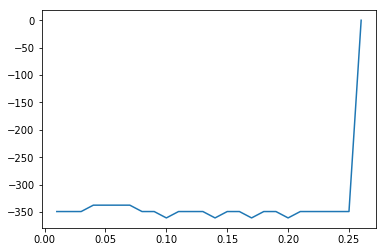

In [19]:
import matplotlib.pyplot as plt
plt.plot(T,bottom_speed)

### Initial position

In [17]:
r.disk_bottom.target_rot_position = 0
r.disk_middle.target_rot_position = 0
r.disk_top.target_rot_position = 0

rotation position mode is not enabled in the module please use 'robot.module.rot_position_mode = True' to enable it
rotation position mode is not enabled in the module please use 'robot.module.rot_position_mode = True' to enable it
rotation position mode is not enabled in the module please use 'robot.module.rot_position_mode = True' to enable it


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/augustin/dev/pyluos/pyluos/io/serial_io.py", line 89, in _poll
    to_read = self._serial.in_waiting
  File "/Users/augustin/.virtualenvs/spherical-joint/lib/python3.6/site-packages/serial/serialposix.py", line 467, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 6] Device not configured



In [6]:
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_top.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_bottom.target_rot_position = -q13
print(q11,q12,q13)

-29.999999999999996 -30.000000000000014 -29.99999999999997


/Users/augustin/dev/spherical-joint/spherical_joint/spherical_joint/spherical_joint.py:86: RuntimeWarning: invalid value encountered in double_scalars
  vector_norm.append(i/LA.norm(vec))


In [6]:
print(r.disk_top.rot_position, r.disk_middle.rot_position, r.disk_bottom.rot_position)

0.0 0.0 0.0


## Demo 1 : Yes/No

2) Yes


In [7]:
t=0
while t < 2.5:
    X=0.2*math.sin(10*t)
    q11,q12,q13 = a.get_angles_from_vector([X,0,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13
    time.sleep(0.01)
    t=t+0.01

1) No

In [8]:
t=0
while t < 2.5:
    angle=10*math.sin(5*t)
    q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],angle)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13
    time.sleep(0.01)
    t=t+0.01

both

In [9]:
t=0
while t < 2.5:
    angle1=0.2*math.sin(20*t)
    angle2=0.2*math.sin(10*t)
    q11,q12,q13 = a.get_angles_from_vector([0.2+angle1,angle2,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13
    time.sleep(0.01)
    t=t+0.01

## Demo 2 : Rotation of the platform / Exorcist

In [8]:
q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],0)
r.disk_top.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_bottom.target_rot_position = -q13

time.sleep(1)
angle = 0
for i in range(360):
    angle=i
    time.sleep(0.01)
    q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],angle)
    
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

time.sleep(1)
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_bottom.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_top.target_rot_position = -q13

WIP : send an array to the target_rot_pos

In [8]:
q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],0)
r.disk_top.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_bottom.target_rot_position = -q13

r.disk_top.sampling_freq = 100
r.disk_middle.sampling_freq = 100
r.disk_bottom.sampling_freq = 100

top_tab = []
middle_tab = []
bottom_tab = []

time.sleep(1)
angle = 0

r.disk_top.pause()
r.disk_middle.pause()
r.disk_bottom.pause()

#r.disk_middle.compliant = True
#r.disk_bottom.compliant = True

for i in range(360):
    angle=i
    q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],angle)
    
    top_tab.append(-q11)
    middle_tab.append(-q12)
    bottom_tab.append(-q13)
    
r.disk_top.target_rot_position = np.array(top_tab)
time.sleep(0.01)
r.disk_middle.target_rot_position = np.array(middle_tab)
time.sleep(0.01)
r.disk_bottom.target_rot_position = np.array(bottom_tab)

r.disk_top.play()
r.disk_middle.play()
r.disk_middle.play()

time.sleep(1)
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_bottom.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_top.target_rot_position = -q13

## Demo 3 : Circle

In [13]:
Rtest = 4
centerTest = 10
angle=0
t=0
a.reset_last_angles()
a.reset_offset()

while t<3*2*math.pi: #TEST CIRCLE PARAMETRIC EQUATION:
    locus = np.array([Rtest*math.cos(t),Rtest*math.sin(t),centerTest])
    t=t+math.pi/50
    angle = angle
    
    q11,q12,q13 = a.get_angles_from_vector(locus,angle)
    
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

    
    time.sleep(0.005)

## Demo 4 : Circle and rotation

In [ ]:
Rtest = 4
centerTest = 10
angle=0
t=0

a.reset_last_angles()
a.reset_offset()

while t<2*2*math.pi:
    locus = np.array([Rtest*math.cos(t),Rtest*math.sin(t),centerTest])
    t=t+math.pi/1000
    angle = angle+1
    
    q11,q12,q13 = a.get_angles_from_vector(locus,angle)
    
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13


    time.sleep(0.01)

## Demo 5 : Record and play moves
1) Record and play a pose

In [ ]:
pose = [r.disk_top.rot_position,r.disk_middle.rot_position,r.disk_bottom.rot_position]

In [ ]:
r.disk_top.target_rot_position = pose[0]
r.disk_middle.target_rot_position = pose[1]
r.disk_bottom.target_rot_position = pose[2]

2) Record a move

In [48]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

Input = []
T = []
t=0
top = []
middle = []
bottom = []

def Listener():
    global Input
    Input = input()
    
listener = threading.Thread(target=Listener)
listener.start()
move = []

while True:
    if type(Input) == type(""):
        break
    else :
        move.append([r.disk_top.rot_position,r.disk_middle.rot_position,r.disk_bottom.rot_position])
        t=t+0.005
        T.append(t)
        top.append(move[-1][0])
        middle.append(move[-1][1])
        bottom.append(move[-1][2])
    time.sleep(0.005)

3) Play a move

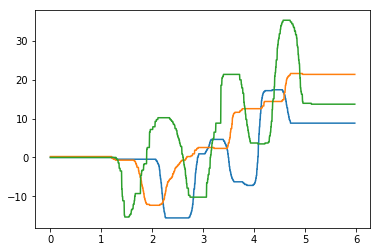

In [50]:
from matplotlib import pyplot as plt
plt.plot(T,top, label = 'top')
plt.plot(T,middle, label='middle')
plt.plot(T,bottom, label = 'bottom')

In [53]:
r.disk_bottom.compliant = False
r.disk_middle.compliant = False
r.disk_top.compliant = False

for i in range(len(move)):
    r.disk_top.target_rot_position = move[i][0]
    r.disk_middle.target_rot_position = move[i][1]
    r.disk_bottom.target_rot_position = move[i][2]
    time.sleep(0.005)

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/augustin/dev/pyluos-master/pyluos/io/serial_io.py", line 89, in _poll
    to_read = self._serial.in_waiting
  File "/Users/augustin/.virtualenvs/spherical-joint/lib/python3.6/site-packages/serial/serialposix.py", line 467, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 6] Device not configured

